# 1.张量的数据类型

In [58]:
#导入需要的库
import torch

In [59]:
#获取张量的数据类型
torch.tensor([1.2,3.4]).dtype

torch.float64

In [60]:
#张量的默认数据类型设置为其他类型
torch.set_default_dtype(torch.float64)
torch.tensor([1.2,3.4]).dtype
#注意：set_default_dtype()只支持设置浮点类型数据

torch.float64

In [61]:
##将张量数据类型转化为整形
a=torch.tensor([1.2,3.4])
print("a.dtype:",a.dtype)
print("a.long()方法:",a.long().dtype)
print("a.int()方法:",a.int().dtype)
print("a.float()方法:",a.float().dtype)

a.dtype: torch.float64
a.long()方法: torch.int64
a.int()方法: torch.int32
a.float()方法: torch.float32


In [63]:
#恢复torch默认的数据类型
torch.set_default_tensor_type(torch.FloatTensor)
torch.tensor([1.2,3.4]).dtype

torch.float32

In [64]:
#获取默认的数据类型
torch.get_default_dtype()

torch.float32

# 2.生成张量

### 2.1基本方法

In [2]:
import torch
A = torch.tensor([[1.0,1.0],[2,2]])
A

tensor([[1., 1.],
        [2., 2.]])

In [5]:
## 获取张量的形状
A.shape
A.size()

torch.Size([2, 2])

In [6]:
## 获取张量的形状
A.size()

torch.Size([2, 2])

In [7]:
## 计算张量中所含元素的个数
A.numel()

4

In [10]:
## 指定张量的数据类型和是否计算梯度
B = torch.tensor((1,2,3),dtype=torch.float32,requires_grad=True)
B

tensor([1., 2., 3.], requires_grad=True)

In [36]:
## 因为张量B是可以计算梯度的，所以可以计算sum(B^2)的梯度
y = B.pow(2).sum()
print(y)
y.backward()
B.grad #每一次的梯度会加上之前得到的梯度

tensor(14., grad_fn=<SumBackward0>)


tensor([ 42.,  84., 126.])

In [27]:
## 注意只有浮点类型的张量才允许计算梯度
B = torch.tensor((1,2,3),dtype=torch.int32,requires_grad=True)

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [37]:
## 利用torch.Tensor()获得张量
C = torch.Tensor([1,2,3,4])
C

tensor([1., 2., 3., 4.])

In [62]:
## 创建具有特定大小的张量
D = torch.Tensor(2,3)
D

tensor([[8.5764e-07, 1.2801e-11, 2.1029e+20],
        [5.4885e-05, 8.4936e+20, 3.1986e+21]])

In [63]:
## 创建与另一个张量大小和类型相同的张量
torch.ones_like(D)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [65]:
torch.zeros_like(D)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [69]:
torch.rand_like(D)

tensor([[0.8906, 0.1025, 0.3625],
        [0.4898, 0.1541, 0.6386]])

In [72]:
## 创建一个类型相似但尺寸不同的张量
E = [[1,2],[3,4]]
#print("E.dtype:",E.dtype)
#E 目前是一个list
E = D.new_tensor(E)
print("D.dtype:",D.dtype)
print("E.dtype:",E.dtype)
#E 编程一个tensor
E

D.dtype: torch.float32
E.dtype: torch.float32


tensor([[1., 2.],
        [3., 4.]])

In [76]:
D.new_full((3,3),fill_value = 1)


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [77]:
D.new_zeros((3,3))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [75]:
D.new_empty((3,3))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

### 2.2利用numpy数组生成张量

In [99]:
import numpy as np
F = np.ones((3,3))
print(F)
##使用torch.as_tensor()函数
Ftensor = torch.as_tensor(F)
Ftensor

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [101]:
## 使用torch.from_numpy()函数
Ftensor = torch.from_numpy(F)
Ftensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [103]:
## 使用张量的.numpy()将张量转化为numpy数组
Ftensor.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### 2.3设置随机数种子

In [104]:
## 设置随机数种子
torch.manual_seed(123)

In [122]:
## 通过指定均值和标准差生成随机数
torch.manual_seed(123)
A = torch.normal(mean = 0.0,std = torch.tensor(1.0))
A

tensor(-0.1115)

In [1]:
## 通过指定均值和标准差生成随机数
import torch
torch.manual_seed(123)
A = torch.normal(mean = torch.tensor(0.0),std = 1.0)
A

tensor(-0.1115)

In [7]:
## 通过指定均值和标准差生成随机数
torch.manual_seed(123)
A = torch.normal(mean = 0.0, std=torch.arange(1,5.0))#不包含END 
B = torch.normal(mean = 0.0, std=torch.range(1,5.0))#包含END
print(A)
print(A.dtype)
print(B)
print(B.dtype)

tensor([-0.1115,  0.2407, -1.1089, -0.9617])
torch.float32
tensor([-1.1969,  0.4185, -2.9171, -3.0202,  1.6195])
torch.float32


e:\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  after removing the cwd from sys.path.


In [8]:
## 在区间（0,1）上生成服从均匀分布的张量
torch.manual_seed(123)
B = torch.rand(3,4)
B

tensor([[0.2961, 0.5166, 0.2517, 0.6886],
        [0.0740, 0.8665, 0.1366, 0.1025],
        [0.1841, 0.7264, 0.3153, 0.6871]])

In [9]:
# 生成和其他张量尺寸相同的随机数张量
torch.manual_seed(123)
C = torch.ones(2,3)
D = torch.rand_like(C)
D

tensor([[0.2961, 0.5166, 0.2517],
        [0.6886, 0.0740, 0.8665]])

In [10]:
## 生成服从标准正态分布的随机数
print(torch.randn(3,3))
print(torch.randn_like(C))

tensor([[ 0.9447,  0.6217, -1.3501],
        [-0.1881, -2.3891, -0.4759],
        [ 1.7603,  0.6547,  0.5490]])
tensor([[ 0.3671,  0.1219,  0.6466],
        [-1.4168,  0.8429, -0.6307]])


In [23]:
## 将0~10(不包括10)之间的整数随机排序
torch.manual_seed(123)
torch.randperm(10)


tensor([2, 0, 8, 1, 3, 7, 4, 9, 5, 6])

### 2.4其他生成张量的函数

In [24]:
## 使用torch.arange()生成张量
torch.arange(start=0, end=10, step=2)

tensor([0, 2, 4, 6, 8])

In [32]:
## 在范围内生成固定数量的等间隔张量
torch.linspace(start=1,end=10,steps=5)

tensor([ 1.0000,  3.2500,  5.5000,  7.7500, 10.0000])

In [33]:
## 生成以对数间隔的点
torch.logspace(start=0.1,end=1.0,steps=5)

tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])

In [38]:
10**torch.linspace(start=0.1,end=1.0,steps=5)

tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])

In [39]:
torch.linspace(start=0.1,end=1.0,steps=5)

tensor([0.1000, 0.3250, 0.5500, 0.7750, 1.0000])

In [45]:
#torch.zeros(3,3)
#torch.ones(3,3)
torch.eye(3)
#torch.empty(3,3)
#torch.full((3,3),fill_value=0.25)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

# 3.张量的操作

### 3.1改变张量的尺寸

In [61]:
## 使用tensor.reshape()函数设置张量的尺寸
A = torch.arange(12.0).reshape(3,4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [59]:
## 使用torch.reshape()
torch.reshape(input=A, shape=(2,-1))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [62]:
## 使用resize_方法
A.resize_(2,6)
A

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [65]:
## 使用
B = torch.arange(10.0,19.0).reshape(3,3)
B
A.resize_as_(B)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [66]:
B

tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])

In [69]:
## torch.unsqueeze()返回在指定维度插入尺寸为1的新张量
A=torch.arange(12.0).reshape(2,6)
B=torch.unsqueeze(A,dim=0)
print(B.shape)
B

torch.Size([1, 2, 6])


tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10., 11.]]])

In [81]:
## torch.squeeze()函数移除所有维度为1的维度
C= B.unsqueeze(dim=3)
print("C.shape:",C.shape)
#print(C)
D= torch.squeeze(C)
print("D.shape:",D.shape)
print(D)
## 移除指定维度为1的维度
E = torch.squeeze(C,dim=0)
print("E.shape:",E.shape)
print(E)

C.shape: torch.Size([1, 2, 6, 1])
D.shape: torch.Size([2, 6])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])
E.shape: torch.Size([2, 6, 1])
tensor([[[ 0.],
         [ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]],

        [[ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.],
         [11.]]])


In [84]:
## 使用.expand()方法拓展张量

A=torch.arange(3)
A
B=A.expand(3,-1)
B

tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])

In [85]:
## 使用expand_as()方法拓展张量
C= torch.arange(6).reshape(2,3)
B= A.expand_as(C)
B

tensor([[0, 1, 2],
        [0, 1, 2]])

In [87]:
## 使用.repeat()方法拓展张量
## B的shape是(2,3)，首先扩展橙(1,2,3)再按照repeat重复变为(1,4,6)
D= B.repeat(1,2,2)
print(D)
print(D.shape)


tensor([[[0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2]]])
torch.Size([1, 4, 6])


### 3.2获取张量中的元素

In [91]:
## 利用切片和索引获取张量中的元素
A = torch.arange(12).reshape(1,3,4)
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])

In [92]:
A[0]

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [93]:
## 获取第0维度下的矩阵前两行元素
A[0,0:2,:]

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [95]:
## 获取第0维度下的矩阵，最后一行-4~-1列
A[0,-1,-4:-1]

tensor([ 8,  9, 10])

In [96]:
## 根据条件筛选
B=-A
torch.where(A>5,A,B)

tensor([[[ 0, -1, -2, -3],
         [-4, -5,  6,  7],
         [ 8,  9, 10, 11]]])

In [97]:
## 获取A中某个元素
A[0,2,3]

tensor(11)

In [98]:
## 获取矩阵张量的下三角部分
torch.tril(A,diagonal=0)

tensor([[[ 0,  0,  0,  0],
         [ 4,  5,  0,  0],
         [ 8,  9, 10,  0]]])

In [99]:
## diagonal参数控制对角线从哪个元素开始
torch.tril(A,diagonal=1)

tensor([[[ 0,  1,  0,  0],
         [ 4,  5,  6,  0],
         [ 8,  9, 10, 11]]])

In [100]:
## 获取矩阵张量的上三角部分
torch.triu(A,diagonal=0)

tensor([[[ 0,  1,  2,  3],
         [ 0,  5,  6,  7],
         [ 0,  0, 10, 11]]])

In [101]:
torch.triu(A,diagonal=1)

tensor([[[ 0,  1,  2,  3],
         [ 0,  0,  6,  7],
         [ 0,  0,  0, 11]]])

In [102]:
## 获取矩阵张量的上三角部分，input,需要是一个二维的张量
C = A.reshape(3,4)
print(C)
print(torch.diag(C,diagonal=0))
print(torch.diag(C,diagonal=1))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([ 0,  5, 10])
tensor([ 1,  6, 11])


In [103]:
## 提供对角线元素生成矩阵张量
torch.diag(torch.tensor([1,2,3]))

tensor([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]])

### 3.3张量的拼接和拆分

In [144]:
## 在给定维度中连接给定的张量序列
A = torch.arange(6.0).reshape(2,3)
B = torch.linspace(0,10,6).reshape(2,3)
## 在0维度连接张量
C = torch.cat((A,B),dim=0)
C

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [108]:
## 在1维度连接张量
D = torch.cat((A,B),dim=1)
D

tensor([[ 0.,  1.,  2.,  0.,  2.,  4.],
        [ 3.,  4.,  5.,  6.,  8., 10.]])

In [111]:
## 在1维度连接3个张量
E = torch.cat((A[:,1:3],A,B),dim=1)## A[:,1:3]表示A张量0维全部，1维元素1~2
E

tensor([[ 1.,  2.,  0.,  1.,  2.,  0.,  2.,  4.],
        [ 4.,  5.,  3.,  4.,  5.,  6.,  8., 10.]])

In [153]:
## 沿着新维度连接张量
F = torch.stack((A,B),dim=1)
print(F)
F.shape ## 两个2x3的矩阵组合在一起

tensor([[[ 0.,  1.,  2.],
         [ 0.,  2.,  4.]],

        [[ 3.,  4.,  5.],
         [ 6.,  8., 10.]]])


torch.Size([2, 2, 3])

In [122]:
G = torch.stack((A,B),dim=2)
print(G)
G.shape

tensor([[[[1, 2],
          [1, 3]],

         [[3, 4],
          [3, 5]]],


        [[[5, 6],
          [5, 7]],

         [[7, 8],
          [7, 9]]]])


torch.Size([2, 2, 2, 2])

In [123]:
## 将张量分割为特定数量的块
## 在行上将张量E分为两块
torch.chunk(E,2,dim=0)

(tensor([[1., 2., 0., 1., 2., 0., 2., 4.]]),
 tensor([[ 4.,  5.,  3.,  4.,  5.,  6.,  8., 10.]]))

In [136]:
D1,D2=torch.chunk(E,2,dim=1)
print(D1)
print(D2)

tensor([[1., 2., 0., 1.],
        [4., 5., 3., 4.]])
tensor([[ 2.,  0.,  2.,  4.],
        [ 5.,  6.,  8., 10.]])


In [139]:
## 如果沿给定维度dim的张量大小不能被整除，则最后一个块将最小
E1,E2,E3=torch.chunk(E,3,dim=1)
print(E1)
print(E2)
print(E3)

tensor([[1., 2., 0.],
        [4., 5., 3.]])
tensor([[1., 2., 0.],
        [4., 5., 6.]])
tensor([[ 2.,  4.],
        [ 8., 10.]])


In [154]:
## 将张量切分为块，指定每块的大小
D1,D2,D3=torch.split(D,[1,2,3],dim=1)
print(D1)
print(D2)
print(D3)

tensor([[0.],
        [3.]])
tensor([[1., 2.],
        [4., 5.]])
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])


### 3.4张量计算 比较大小

In [155]:
## 比较两个数是否接近
A = torch.tensor([10.0])
B = torch.tensor([10.1])
print(torch.allclose(A,B,rtol=1e-05,atol=1e-08,equal_nan=False))
print(torch.allclose(A,B,rtol=0.1,atol=0.01,equal_nan=False))

False
True


In [160]:
## 计算元素是否相等
A = torch.tensor([1,2,3,4,5,6])
B = torch.arange(1,7)
C = torch.unsqueeze(B,dim=0)
print(C)
# torch.eq()是比较内部的元素
print(torch.eq(A,B))
print(torch.eq(A,C))

tensor([[1, 2, 3, 4, 5, 6]])
tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])


In [161]:
## 判断两个张量是否具有相同的尺寸和元素
print(torch.equal(A,B))
print(torch.equal(A,C))

True
False


In [162]:
## 逐元素比较大于等于
print(torch.ge(A,B))
print(torch.ge(A,C))

tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])


In [163]:
## 大于
print(torch.gt(A,B))
print(torch.gt(A,C))

tensor([False, False, False, False, False, False])
tensor([[False, False, False, False, False, False]])


In [164]:
## 小于等于/小于
print(torch.le(A,B))
print(torch.lt(A,C))

tensor([True, True, True, True, True, True])
tensor([[False, False, False, False, False, False]])


In [165]:
## 不等于
print(torch.ne(A,B))
print(torch.ne(A,C))

tensor([False, False, False, False, False, False])
tensor([[False, False, False, False, False, False]])


In [166]:
## 判断是否为缺失值
torch.isnan(torch.tensor([0,1,float("nan"),2]))

tensor([False, False,  True, False])

### 3.5基本运算

In [169]:
## 矩阵逐元素相乘
A = torch.arange(6.0).reshape(2,3)
B = torch.linspace(10,20,6).reshape(2,3)
print("A:",A)
print("B:",B)
print(A*B)
##逐元素相除
print(A/B)

A: tensor([[0., 1., 2.],
        [3., 4., 5.]])
B: tensor([[10., 12., 14.],
        [16., 18., 20.]])
tensor([[  0.,  12.,  28.],
        [ 48.,  72., 100.]])
tensor([[0.0000, 0.0833, 0.1429],
        [0.1875, 0.2222, 0.2500]])


In [172]:
## 逐元素相加
print(A+B)
## 逐元素相减
print(A-B)
## 逐元素相除
print(B/A)

tensor([[10., 13., 16.],
        [19., 22., 25.]])
tensor([[-10., -11., -12.],
        [-13., -14., -15.]])
tensor([[    inf, 12.0000,  7.0000],
        [ 5.3333,  4.5000,  4.0000]])


In [173]:
## 张量的幂
print(torch.pow(A,3))
print(A**3)

tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]])
tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]])


In [174]:
## 张量的指数
torch.exp(A)

tensor([[  1.0000,   2.7183,   7.3891],
        [ 20.0855,  54.5981, 148.4132]])

In [175]:
## 张量的对数
torch.log(A)

tensor([[  -inf, 0.0000, 0.6931],
        [1.0986, 1.3863, 1.6094]])

In [176]:
## 张量的平方根
print(torch.sqrt(A))
print(A**0.5)

tensor([[0.0000, 1.0000, 1.4142],
        [1.7321, 2.0000, 2.2361]])
tensor([[0.0000, 1.0000, 1.4142],
        [1.7321, 2.0000, 2.2361]])


In [177]:
## 张量的平方根倒数
print(torch.rsqrt(A))
print(1/A**0.5)

tensor([[   inf, 1.0000, 0.7071],
        [0.5774, 0.5000, 0.4472]])
tensor([[   inf, 1.0000, 0.7071],
        [0.5774, 0.5000, 0.4472]])


In [179]:
## 张量的数据裁剪
#元素超过4，按4算
torch.clamp_max(A,4)

tensor([[0., 1., 2.],
        [3., 4., 4.]])

In [180]:
## 张量数据裁剪
torch.clamp_min(A,3)

tensor([[3., 3., 3.],
        [3., 4., 5.]])

In [182]:
## 张量数据裁剪
## 规定上下限
torch.clamp(A,2.5,4)

tensor([[2.5000, 2.5000, 2.5000],
        [3.0000, 4.0000, 4.0000]])

In [183]:
## 矩阵的转置
C = torch.t(A)
C

tensor([[0., 3.],
        [1., 4.],
        [2., 5.]])

In [185]:
## 矩阵运算，矩阵相乘，A的行数要等于C的列数
A.matmul(C)

tensor([[ 5., 14.],
        [14., 50.]])

In [186]:
A = torch.arange(12.0).reshape(2,2,3)
B = torch.arange(12.0).reshape(2,3,2)
print(A)
print(B)
AB = torch.matmul(A,B)
AB

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])
tensor([[[ 0.,  1.],
         [ 2.,  3.],
         [ 4.,  5.]],

        [[ 6.,  7.],
         [ 8.,  9.],
         [10., 11.]]])


tensor([[[ 10.,  13.],
         [ 28.,  40.]],

        [[172., 193.],
         [244., 274.]]])

In [187]:
## 矩阵相乘只计算最后面的两个维度的乘法
print(AB[0].eq(torch.matmul(A[0],B[0])))
print(AB[1].eq(torch.matmul(A[1],B[1])))

tensor([[True, True],
        [True, True]])
tensor([[True, True],
        [True, True]])


In [188]:
## 计算矩阵的逆
C = torch.rand(3,3)
D = torch.inverse(C)
torch.mm(C,D) #矩阵和矩阵的逆相乘得到单位矩阵

tensor([[ 1.0000e+00,  2.9802e-08, -1.1921e-07],
        [ 2.9802e-08,  1.0000e+00, -5.9605e-08],
        [ 0.0000e+00,  5.9605e-08,  1.0000e+00]])

In [189]:
## 计算矩阵的迹，对角线元素的和
torch.trace(torch.arange(9.0).reshape(3,3))

tensor(12.)

### 3.6统计相关的计算

#### 3.6.1 1D和2D张量获取最大值和最小值 

In [192]:
## 1维张量的最大值和最小值
A = torch.tensor([12.,34.,25,11,67,32,29,30,99,55,23,44])
## 最大值和位置
print("最大值：",A.max())
print("最大值位置：",A.argmax())
## 最小值和位置
print("最小值：",A.min())
print("最小值位置：",A.argmin())

最大值： tensor(99.)
最大值位置： tensor(8)
最小值： tensor(11.)
最小值位置： tensor(3)


In [197]:
## 二维张量的最大值和最小值
B = A.reshape(3,4)
print("2-D张量B:\n",B)
## 最大值以及位置（每行）
print("最大值:\n",B.max(dim=1))
print("最大值位置：",B.argmax(dim=1))
## 最小值以及位置（每行）
print("最小值:\n",B.min(dim=0))
print("最小值位置：",B.argmin(dim=0))

2-D张量B:
 tensor([[12., 34., 25., 11.],
        [67., 32., 29., 30.],
        [99., 55., 23., 44.]])
最大值:
 torch.return_types.max(
values=tensor([34., 67., 99.]),
indices=tensor([1, 0, 0]))
最大值位置： tensor([1, 0, 0])
最小值:
 torch.return_types.min(
values=tensor([12., 32., 23., 11.]),
indices=tensor([0, 1, 2, 0]))
最小值位置： tensor([0, 1, 2, 0])


#### 3.6.2 1D和2D张量排序

In [198]:
## 张量排序，分别输出从小到大的排序结果和相应的元素在元素位置的索引
torch.sort(A)

torch.return_types.sort(
values=tensor([11., 12., 23., 25., 29., 30., 32., 34., 44., 55., 67., 99.]),
indices=tensor([ 3,  0, 10,  2,  6,  7,  5,  1, 11,  9,  4,  8]))

In [199]:
## 按照降序排列
torch.sort(A,descending=True)

torch.return_types.sort(
values=tensor([99., 67., 55., 44., 34., 32., 30., 29., 25., 23., 12., 11.]),
indices=tensor([ 8,  4,  9, 11,  1,  5,  7,  6,  2, 10,  0,  3]))

In [200]:
## 对2-D张量进行排序
Bsort,Bsort_id=torch.sort(B)
print("B sort:\n",Bsort)
print("B sort index:\n",Bsort_id)
print("B argsort:\n",torch.argsort(B))

B sort:
 tensor([[11., 12., 25., 34.],
        [29., 30., 32., 67.],
        [23., 44., 55., 99.]])
B sort index:
 tensor([[3, 0, 2, 1],
        [2, 3, 1, 0],
        [2, 3, 1, 0]])
B argsort:
 tensor([[3, 0, 2, 1],
        [2, 3, 1, 0],
        [2, 3, 1, 0]])


In [202]:
## 获取张量前几大的数值
torch.topk(A,4)

torch.return_types.topk(
values=tensor([99., 67., 55., 44.]),
indices=tensor([ 8,  4,  9, 11]))

In [203]:
## 获取2D张量每列前几大的数值
Btop2,Btop2_id=torch.topk(B,2,dim=0)
print("B 每列 top2:\n",Btop2)
print("B 每列 top2 位置:\n",Btop2_id)

B 每列 top2:
 tensor([[99., 55., 29., 44.],
        [67., 34., 25., 30.]])
B 每列 top2 位置:
 tensor([[2, 2, 1, 2],
        [1, 0, 0, 1]])


In [204]:
## 获取张量第K小的数值和位置
torch.kthvalue(A,3)

torch.return_types.kthvalue(
values=tensor(23.),
indices=tensor(10))

In [205]:
## 获取2D张量第K小的数值和位置
torch.kthvalue(B,3,dim=1)

torch.return_types.kthvalue(
values=tensor([25., 32., 55.]),
indices=tensor([2, 1, 1]))

In [207]:
## 获取2D张量第K小的数值和位置
Bkth,Bkth_id=torch.kthvalue(B,3,dim=1,keepdim=True)
print(Bkth)
print(Bkth_id)


tensor([[25.],
        [32.],
        [55.]])
tensor([[2],
        [1],
        [1]])


#### 3.6.3 1D和2D张量计算平均值

In [211]:
## 平均值，计算每行的均值
print(torch.mean(B,dim=1,keepdim=True))
## 平均值，计算每列的均值
print(torch.mean(B,dim=0,keepdim=True))

tensor([[20.5000],
        [39.5000],
        [55.2500]])
tensor([[59.3333, 40.3333, 25.6667, 28.3333]])


#### 3.6.4 计算和，计算累加和，计算中位数，计算乘积，计算累乘积

In [212]:
## 计算每行的和
print(torch.sum(B,dim=1,keepdim=True))
## 计算每列的和
print(torch.sum(B,dim=0,keepdim=True))

tensor([[ 82.],
        [158.],
        [221.]])
tensor([[178., 121.,  77.,  85.]])


In [213]:
## 按照行计算累加和
print(torch.cumsum(B,dim=1))
## 按照列计算累加和
print(torch.cumsum(B,dim=0))

tensor([[ 12.,  46.,  71.,  82.],
        [ 67.,  99., 128., 158.],
        [ 99., 154., 177., 221.]])
tensor([[ 12.,  34.,  25.,  11.],
        [ 79.,  66.,  54.,  41.],
        [178., 121.,  77.,  85.]])


In [214]:
## 计算每行的中位数
print(torch.median(B,dim=1,keepdim=True))
## 计算每列的中位数
print(torch.median(B,dim=0,keepdim=True))

torch.return_types.median(
values=tensor([[12.],
        [30.],
        [44.]]),
indices=tensor([[0],
        [3],
        [3]]))
torch.return_types.median(
values=tensor([[67., 34., 25., 30.]]),
indices=tensor([[1, 0, 0, 1]]))


In [215]:
## 按照行计算乘积
print(torch.prod(B,dim=1,keepdim=True))
## 按照列计算乘积
print(torch.prod(B,dim=0,keepdim=True))

tensor([[ 112200.],
        [1865280.],
        [5510340.]])
tensor([[79596., 59840., 16675., 14520.]])


In [216]:
## 按照行计算累乘积
print(torch.cumprod(B,dim=1))
## 按照列计算累乘积
print(torch.cumprod(B,dim=0))

tensor([[1.2000e+01, 4.0800e+02, 1.0200e+04, 1.1220e+05],
        [6.7000e+01, 2.1440e+03, 6.2176e+04, 1.8653e+06],
        [9.9000e+01, 5.4450e+03, 1.2524e+05, 5.5103e+06]])
tensor([[1.2000e+01, 3.4000e+01, 2.5000e+01, 1.1000e+01],
        [8.0400e+02, 1.0880e+03, 7.2500e+02, 3.3000e+02],
        [7.9596e+04, 5.9840e+04, 1.6675e+04, 1.4520e+04]])


In [217]:
## 标准差
print(torch.std(A))

tensor(25.0108)


# 4 Torch.nn模块

### 4.1 torch.nn.Conv2d()
使用一张图像来展示经过卷积后的图像效果
使用灰度图像

In [3]:
## 使用一张图像来展示经过卷积后的图像效果
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

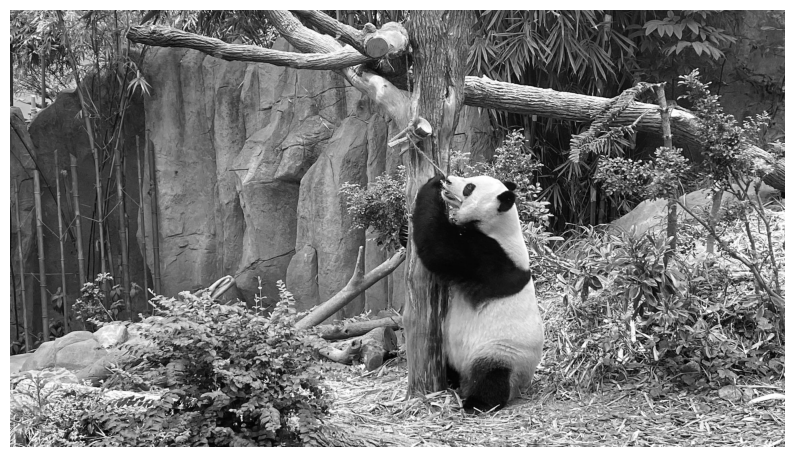

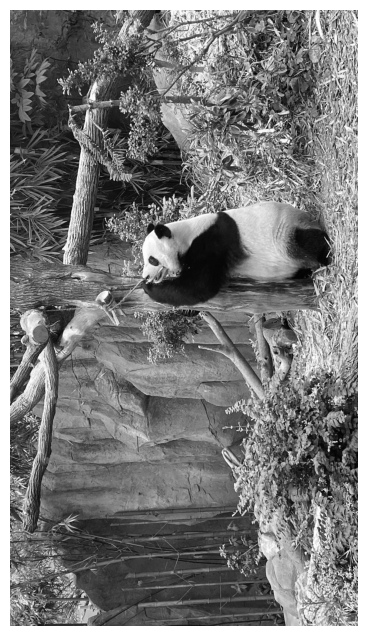

In [4]:
## 读取图像--转化为灰度图片--转化为numpy数组
myim = Image.open("E:\Repositories\Machine-learning\EE_6227\ML_ASSIGNMENT\panda_01.jpg")
myimgray = np.array(myim.convert("L"),dtype=np.float32)
## 利用np.rot90来旋转图片90度，初始导入图片的方向是不对的
myimrotate = np.rot90(myimgray) 
## 可视化图片
plt.figure(figsize=(10,8))
plt.imshow(myimgray,cmap=plt.cm.gray)
plt.axis("off")
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(myimrotate,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [5]:
## 获取图像的的宽和高
h1,w1=myimgray.shape
h2,w2=myimrotate.shape 
print(h1,w1)
print(h2,w2)

1280 2269
2269 1280


In [6]:
## 对灰度图像进行卷积提取图像轮廓
## 将数组转化为张量
imh,imw = myimgray.shape
myimgray_t=torch.from_numpy(myimgray.copy().reshape([1,1,imh,imw]))
#这个原因是因为程序中操作的numpy中有使用负索引的情况：image[…, ::-1]。解决办法比较简单，加入image这个numpy变量引发了错误，返回image.copy()即可。因为copy操作可以在原先的numpy变量中创造一个新的不适用负索引的numpy变量。
myimgray_t.shape
## 因为卷积时需要操作一张图像，所以将图像转化为4维表示[batch,channel,h,w]

torch.Size([1, 1, 1280, 2269])

In [7]:
## 定义边缘检测卷积核，并处理维度为1*1*5*5
kersize=5
ker = torch.ones(kersize,kersize,dtype=torch.float32)*-1
#print(ker)
ker[2,2] = 23
#print(ker)
ker = ker.reshape((1,1,kersize,kersize))
print(ker)
## 进行卷积操作
conv2d = nn.Conv2d(1,1,(kersize,kersize),bias=False,dtype=torch.float32)
print(conv2d)
## 设置卷积时使用的核
conv2d.weight.data=ker
## 对灰度图像进行卷积操作
imconv2dout = conv2d(myimgray_t)
print(imconv2dout)
print(imconv2dout.shape)
## 对卷积后的输出进行维度压缩
imconv2dout_im = imconv2dout.data.squeeze()
print("卷积后的尺寸",imconv2dout_im.shape)
print(imconv2dout_im.type())
print(imconv2dout_im)

tensor([[[[-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., 23., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.]]]])
Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1), bias=False)
tensor([[[[  649.,   575.,    94.,  ...,    -9.,    34.,    50.],
          [  155.,    -4.,  -533.,  ...,  -192.,  -116.,   -52.],
          [ -181.,  -538.,  -769.,  ...,  -347.,  -358.,  -310.],
          ...,
          [ -433.,   485.,   409.,  ...,   792.,   522.,   351.],
          [ -724.,   -13.,    56.,  ...,  -498.,  -883., -1260.],
          [ -783.,    38.,    47.,  ..., -1409., -1363., -1373.]]]],
       grad_fn=<ConvolutionBackward0>)
torch.Size([1, 1, 1276, 2265])
卷积后的尺寸 torch.Size([1276, 2265])
torch.FloatTensor
tensor([[  649.,   575.,    94.,  ...,    -9.,    34.,    50.],
        [  155.,    -4.,  -533.,  ...,  -192.,  -116.,   -52.],
        [ -181.,  -538.,  -769.,  ...,  -347.,  -358.,  -310.],
        ...,
        [ -43

In [8]:
## 查看使用的卷积核
print(conv2d.weight.data)

tensor([[[[-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., 23., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.]]]])


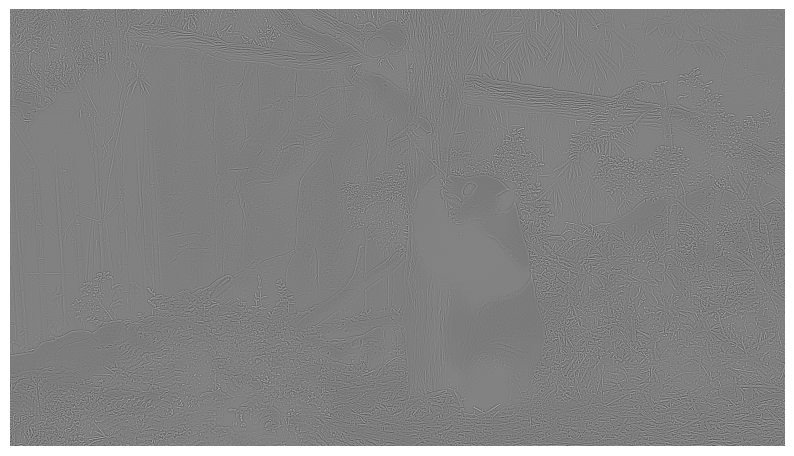

In [9]:
## 可视化卷积后的图像
#output_array=imconv2dout_im.numpy()
#print(imconv2dout_im)
#print(output_array.shape)
#print(output_array)
plt.figure(figsize=(10,8))
plt.imshow(imconv2dout_im.numpy(),cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [10]:
## 定义边缘检测卷积核，并处理维度为1*1*5*5
kersize = 5
ker = torch.ones(kersize,kersize,dtype=torch.float32)*-1
ker[2,2] = 24
ker = ker.reshape(1,1,kersize,kersize)
## 进行卷积操作
conv2d = nn.Conv2d(1,2,(kersize,kersize),bias=False)
## 设置卷积时使用的核，第一个核使用边缘检测核
conv2d.weight.data[0] = ker
## 对灰度图像进行卷积操作
imconv2dout = conv2d(myimgray_t)
## 对卷积后的输出进行维度压缩
imconv2dout_im = imconv2dout.data.squeeze()
print("卷积后尺寸:",imconv2dout_im.shape)
print(imconv2dout_im)

卷积后尺寸: torch.Size([2, 1276, 2265])
tensor([[[ 8.0700e+02,  7.3400e+02,  2.3600e+02,  ...,  1.1100e+02,
           1.5500e+02,  1.7000e+02],
         [ 2.9200e+02,  1.3200e+02, -4.1300e+02,  ..., -7.9000e+01,
          -1.0000e+00,  6.4000e+01],
         [-6.3000e+01, -4.2700e+02, -6.5800e+02,  ..., -2.4000e+02,
          -2.5200e+02, -2.0300e+02],
         ...,
         [-3.1100e+02,  6.4400e+02,  5.7100e+02,  ...,  1.0010e+03,
           7.2400e+02,  5.4600e+02],
         [-6.1800e+02,  1.2300e+02,  2.0100e+02,  ..., -3.5800e+02,
          -7.5700e+02, -1.1490e+03],
         [-6.8100e+02,  1.7500e+02,  1.8800e+02,  ..., -1.3220e+03,
          -1.2760e+03, -1.2860e+03]],

        [[ 1.7280e+01,  1.9865e+01,  1.2058e+01,  ...,  1.2336e+01,
           1.2868e+01,  1.4471e+01],
         [ 1.2881e+01,  1.4993e+01,  2.8073e+00,  ...,  1.0374e+01,
           9.9235e+00,  1.1682e+01],
         [-3.8799e+00,  9.0240e+00,  9.6476e+00,  ...,  6.7261e+00,
           5.5105e+00,  8.2098e+00],
    

In [11]:
## 查看使用的卷积核
## 第一个卷积核是边缘提取，第二个卷积核是随机数
conv2d.weight.data

tensor([[[[-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00],
          [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00],
          [-1.0000e+00, -1.0000e+00,  2.4000e+01, -1.0000e+00, -1.0000e+00],
          [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00],
          [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00]]],


        [[[ 8.7358e-02, -5.3903e-02,  1.1808e-02, -1.7274e-01,  5.6603e-02],
          [ 8.6411e-02,  1.5718e-02, -3.4479e-02, -1.2431e-01,  5.9065e-02],
          [-1.0083e-01,  1.5054e-01,  1.7900e-01, -1.6775e-02,  6.7776e-02],
          [ 4.6047e-02, -1.5578e-01,  5.0965e-02, -1.4596e-01,  1.9074e-01],
          [-6.5076e-02,  1.2202e-01,  1.8325e-01, -1.8015e-01, -1.5726e-01]]]])

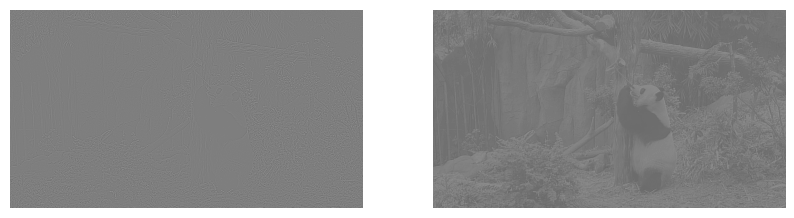

In [17]:
## 可视化卷积后的图像
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(imconv2dout_im[0],cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(imconv2dout_im[1],cmap=plt.cm.gray)
plt.axis("off")
plt.show()


### 4.2常用的池化层

最大值池化，平均值池化与自适应平均值池化为例进行相关介绍

In [15]:
imconv2dout_im.shape

torch.Size([2, 1276, 2265])

In [24]:
## 对卷积后的结果进行最大值池化
maxpool2 = nn.MaxPool2d(2,stride=2)
pool2_out = maxpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
print(pool2_out_im.shape)
print(pool2_out_im)


torch.Size([2, 638, 1132])
tensor([[[ 8.0700e+02,  2.3600e+02,  4.3000e+01,  ...,  1.1000e+01,
           1.4200e+02,  1.5500e+02],
         [ 6.9000e+01,  4.9000e+01,  8.1900e+02,  ...,  1.1800e+02,
           2.4300e+02, -2.3000e+02],
         [ 3.4000e+02,  4.6800e+02,  1.0990e+03,  ...,  8.9000e+01,
           1.3400e+02,  2.8600e+02],
         ...,
         [-2.8400e+02,  6.5200e+02,  3.0800e+02,  ...,  7.7200e+02,
           9.4600e+02,  1.0860e+03],
         [ 6.4400e+02,  6.6900e+02, -1.1300e+02,  ...,  6.7200e+02,
           8.8400e+02,  1.1800e+03],
         [ 1.7500e+02,  2.2100e+02,  8.0100e+02,  ...,  1.1900e+02,
          -7.9000e+01, -3.5800e+02]],

        [[ 1.9865e+01,  1.2058e+01,  1.3460e+01,  ...,  1.2496e+01,
           1.4548e+01,  1.2868e+01],
         [ 1.0102e+01,  2.1447e+01,  1.9692e+01,  ...,  1.6622e+01,
           1.2311e+01,  7.3687e+00],
         [ 2.0232e+01,  2.3358e+01,  2.9661e+01,  ...,  1.2920e+01,
           1.6021e+01,  2.9745e+01],
         ...

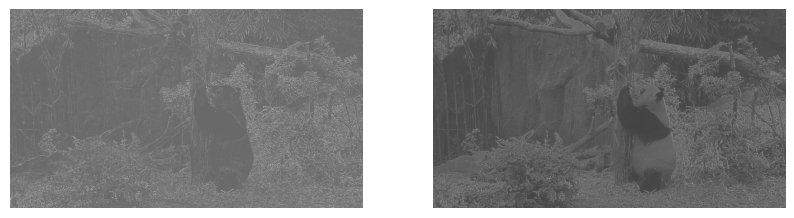

tensor([[ 807.,  236.,   43.,  ...,   11.,  142.,  155.],
        [  69.,   49.,  819.,  ...,  118.,  243., -230.],
        [ 340.,  468., 1099.,  ...,   89.,  134.,  286.],
        ...,
        [-284.,  652.,  308.,  ...,  772.,  946., 1086.],
        [ 644.,  669., -113.,  ...,  672.,  884., 1180.],
        [ 175.,  221.,  801.,  ...,  119.,  -79., -358.]],
       grad_fn=<SelectBackward0>)
tensor([[ 807.,  236.,   43.,  ...,   11.,  142.,  155.],
        [  69.,   49.,  819.,  ...,  118.,  243., -230.],
        [ 340.,  468., 1099.,  ...,   89.,  134.,  286.],
        ...,
        [-284.,  652.,  308.,  ...,  772.,  946., 1086.],
        [ 644.,  669., -113.,  ...,  672.,  884., 1180.],
        [ 175.,  221.,  801.,  ...,  119.,  -79., -358.]])


In [27]:
## 可视化卷积后的图像
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

print(pool2_out_im[0])
print(pool2_out_im[0].data)

In [30]:
## 对卷积后的结果进行自适应平均值池化
AdaAvgpool2 = nn.AdaptiveAvgPool2d(output_size=(100,100))
pool2_out = AdaAvgpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
print(pool2_out.shape)
print(pool2_out_im.shape)

torch.Size([1, 2, 100, 100])
torch.Size([2, 100, 100])


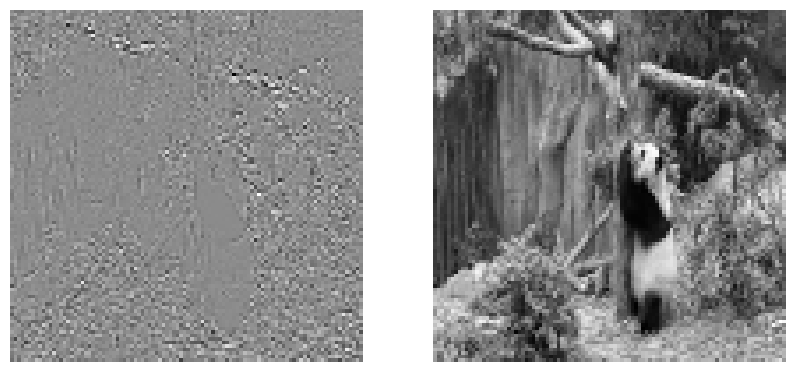

tensor([[ -2.1505, -33.4615, -29.8662,  ...,   1.7191, -18.4712,  -3.2074],
        [ 17.8230,  46.2827, -19.1863,  ...,   3.0466,  -1.8125,  11.3106],
        [-26.2298, -21.2054,  22.3416,  ...,   6.5901,  -4.5208,  -6.8571],
        ...,
        [-23.9534,   4.6190,   8.4907,  ...,  62.9969,  17.8929,  39.3882],
        [-30.6304,  22.7083, -29.0590,  ..., -80.4286, -72.5565, -35.4658],
        [-46.4716,  22.9135, -47.7191,  ...,  -4.1739,  55.1859, -29.6288]],
       grad_fn=<SelectBackward0>)
tensor([[ -2.1505, -33.4615, -29.8662,  ...,   1.7191, -18.4712,  -3.2074],
        [ 17.8230,  46.2827, -19.1863,  ...,   3.0466,  -1.8125,  11.3106],
        [-26.2298, -21.2054,  22.3416,  ...,   6.5901,  -4.5208,  -6.8571],
        ...,
        [-23.9534,   4.6190,   8.4907,  ...,  62.9969,  17.8929,  39.3882],
        [-30.6304,  22.7083, -29.0590,  ..., -80.4286, -72.5565, -35.4658],
        [-46.4716,  22.9135, -47.7191,  ...,  -4.1739,  55.1859, -29.6288]])


In [31]:
## 可视化卷积后的图像
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

print(pool2_out_im[0])
print(pool2_out_im[0].data)

### 4.3激活函数

In [35]:
x = torch.linspace(-6,6,100)
print(x)
print(x.data)
print(x.data.numpy())
## Sigmoid激活函数
sigmoid = nn.Sigmoid()
ysigmoid = sigmoid(x)
## Tanh激活函数
tanh = nn.Tanh()
ytanh = tanh(x)
## ReLU激活函数
relu = nn.ReLU()
yrelu = relu(x)
## Softplus激活函数
softplus = nn.Softplus()
ysoftplus = softplus(x)

tensor([-6.0000, -5.8788, -5.7576, -5.6364, -5.5152, -5.3939, -5.2727, -5.1515,
        -5.0303, -4.9091, -4.7879, -4.6667, -4.5455, -4.4242, -4.3030, -4.1818,
        -4.0606, -3.9394, -3.8182, -3.6970, -3.5758, -3.4545, -3.3333, -3.2121,
        -3.0909, -2.9697, -2.8485, -2.7273, -2.6061, -2.4848, -2.3636, -2.2424,
        -2.1212, -2.0000, -1.8788, -1.7576, -1.6364, -1.5152, -1.3939, -1.2727,
        -1.1515, -1.0303, -0.9091, -0.7879, -0.6667, -0.5455, -0.4242, -0.3030,
        -0.1818, -0.0606,  0.0606,  0.1818,  0.3030,  0.4242,  0.5455,  0.6667,
         0.7879,  0.9091,  1.0303,  1.1515,  1.2727,  1.3939,  1.5152,  1.6364,
         1.7576,  1.8788,  2.0000,  2.1212,  2.2424,  2.3636,  2.4848,  2.6061,
         2.7273,  2.8485,  2.9697,  3.0909,  3.2121,  3.3333,  3.4545,  3.5758,
         3.6970,  3.8182,  3.9394,  4.0606,  4.1818,  4.3030,  4.4242,  4.5455,
         4.6667,  4.7879,  4.9091,  5.0303,  5.1515,  5.2727,  5.3939,  5.5152,
         5.6364,  5.7576,  5.8788,  6.00

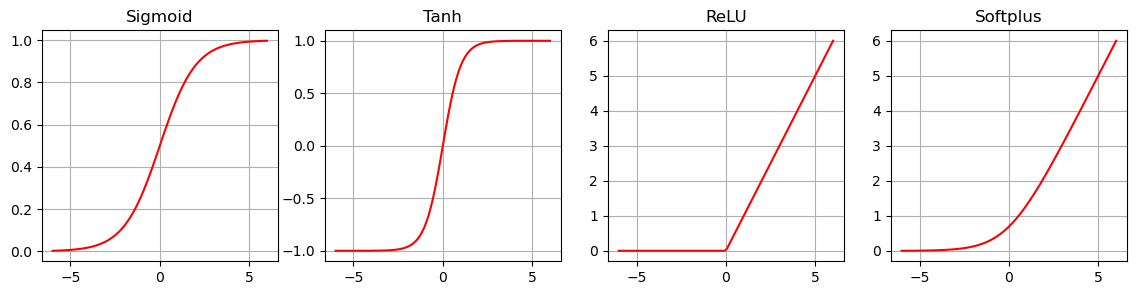

In [61]:
## 可视化激活函数
plt.figure(figsize=(14,3))
plt.subplot(1,4,1)
plt.plot(x.data.numpy(),ysigmoid.data.numpy(),"r")
plt.title("Sigmoid")
plt.grid()
plt.subplot(1,4,2)
plt.plot(x.data.numpy(),ytanh.data.numpy(),"r")
plt.title("Tanh")
plt.grid()
plt.subplot(1,4,3)
plt.plot(x.data.numpy(),yrelu.data.numpy(),"r")
plt.title("ReLU")
plt.grid()
plt.subplot(1,4,4)
plt.plot(x.data.numpy(),ysoftplus.data.numpy(),"r")
plt.title("Softplus")
plt.grid()

# 5.Pytorch中数据从操作和预处理

### 5.1高维数组
1.回归数据
2.分类数据

In [4]:
import torch
import torch.utils.data as Data
import numpy as np
from sklearn.datasets import load_boston,load_iris

In [5]:
## 读取波士顿回归数据
boston_x,boston_y = load_boston(return_X_y=True)
print(boston_x.shape)
print(boston_y.shape)
print("boston_x.dtype:",boston_x.dtype)
print("boston_y.dtype:",boston_y.dtype)

(506, 13)
(506,)
boston_x.dtype: float64
boston_y.dtype: float64


e:\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

In [6]:
## 将训练集x转化为张量，训练集y转化为张量
train_xt=torch.from_numpy(boston_x.astype(np.float32))
train_yt=torch.from_numpy(boston_y.astype(np.float32))
print("train_xt.dtype:",train_xt.dtype)
print("train_yt.dtype:",train_yt.dtype)

train_xt.dtype: torch.float32
train_yt.dtype: torch.float32


In [7]:
## 因为torch构建的网络中默认的数据类型格式是torch.float32，所以转化为张量时，也要先将numpy数据转化为32位浮点数
## 将训练集转化为张量后，使用TensorDataset将X和Y整理到一起
train_data = Data.TensorDataset(train_xt,train_yt)
## 定义一个数据加载器，将训练数据集进行批量处理
train_loader = Data.DataLoader(
    dataset= train_data, ##使用的数据集
    batch_size=64, ##批处理样本大小
    shuffle=True, ##每次迭代前打乱数据
    num_workers=1, ##使用两个进程 
)

## 检查训练数据集的一个batch的样本的维度是否正确
for step, (b_x,b_y) in enumerate(train_loader):
    if step > 0:
        break
## 输出训练图像的尺寸和标签的尺寸，和数据类型
print("b_x.shape:",b_x.shape)
print("b_y.shape:",b_y.shape)
print("b_x.dtype:",b_x.dtype)
print("b_y.dtype:",b_y.dtype)

b_x.shape: torch.Size([64, 13])
b_y.shape: torch.Size([64])
b_x.dtype: torch.float32
b_y.dtype: torch.float32


In [9]:
## 处理分类数据
iris_x,irisy = load_iris(return_X_y=True)
print("iris_x.dtype:",iris_x.dtype)
print("irisy.dtype:",irisy.dtype)
print("iris_x.shape:",iris_x.shape)
print("irisy.shape:",irisy.shape)

iris_x.dtype: float64
irisy.dtype: int32
iris_x.shape: (150, 4)
irisy.shape: (150,)


In [10]:
## 将训练集x转化为张量，训练集y转化为张量
train_xt = torch.from_numpy(iris_x.astype(np.float32))
train_yt = torch.from_numpy(irisy.astype(np.int64))
print("train_xt.dtype:",train_xt.dtype)
print("train_yt.dtype:",train_yt.dtype)

train_xt.dtype: torch.float32
train_yt.dtype: torch.int64


In [11]:
## 因为torch构建的网络中默认的数据格式是torch.float32,所以转化为张量时，数据的特征要转化为32位浮点型，数据的类别标签，
## 要转化为64位有符号整数型

## 将训练集转化为张量后，使用TensorDataset将x和y整理到一起
train_data = Data.TensorDataset(train_xt,train_yt)
## 定义一个数据加载器，将训练数据集进行批量处理
train_loader= Data.DataLoader(
    dataset=train_data, ##使用的数据集
    batch_size=10, # 批处理样本大小
    shuffle=True, # 每次迭代前打乱数据
    num_workers=1,# 使用两个进程
)

## 检查训练数据集的一个batch的样本的维度是否正确
for step,(b_x,b_y) in enumerate(train_loader):
    if step > 0:
        break
## 输出训练图像的尺寸和标签的尺寸，和数据类型
print("b_x.shape:",b_x.shape)
print("b_y.shape:",b_y.shape)
print("b_x.dtype:",b_x.dtype)
print("b_y.dtype:",b_y.dtype)

b_x.shape: torch.Size([10, 4])
b_y.shape: torch.Size([10])
b_x.dtype: torch.float32
b_y.dtype: torch.int64


### 5.2图像数据预处理

In [12]:
## 1.从torchvision中直接加载
## 2.从文件中读取

import torch 
import torch.utils.data as Data
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [16]:
## 使用FashionMNIST数据，准备训练数据集  
train_data = FashionMNIST(
    root="./data/FashionMNIST", #数据的路径
    train = True, #只使用训练数据集
    transform = transforms.ToTensor(),
    download = True #是否下载数据集， true表示下载数据集
)

## 定义一个数据加载器
train_loader = Data.DataLoader(
    dataset = train_data, #使用的数据集
    batch_size = 64, #批处理的大小
    shuffle = True, #每次迭代前打乱数据
    num_workers=2 #使用两个进程
)

## 计算train_loader有多少个batch
print("train_loader的batch数量为:",len(train_loader))

for step,(c_x,c_y) in enumerate(train_loader):
    if step > 0 :
        break
print("c_x.shape,",c_x.shape) # 每个batch图片的维度形状
print("c_y.shape,",c_y.shape)
print("c_x.dtype,",c_x.dtype)
print("c_y.dtype,",c_y.dtype)

train_loader的batch数量为: 938
c_x.shape, torch.Size([64, 1, 28, 28])
c_y.shape, torch.Size([64])
c_x.dtype, torch.float32
c_y.dtype, torch.int64


In [26]:
## 对测试集进行处理
test_data = FashionMNIST(
    root = "./data/FashionMNIST",
    train = False, # False 代表使用t10k-images（测试集）
    download = True
)
print("test_data的长度:",len(test_data))
## 为数据添加一个通道维度，并且取值范围缩放到0~1之间
test_data_x = test_data.data.type(torch.FloatTensor)/255.0
print(test_data_x)

test_data的长度: 10000
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
  